In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/customer_churn_processed_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   country          10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
numeric_cols = df.select_dtypes("number").columns.drop(["exited", "hascrcard", "isactivemember"]).to_list()
categorical_cols = df.select_dtypes("object").columns.tolist() + ["hascrcard", "isactivemember"]

numeric_cols, categorical_cols

(['creditscore',
  'age',
  'tenure',
  'balance',
  'numofproducts',
  'estimatedsalary'],
 ['country', 'gender', 'hascrcard', 'isactivemember'])

## Univariate Analysis

### Target column

In [5]:
# Check number of customers that churned and those that stayed

df["exited"].value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

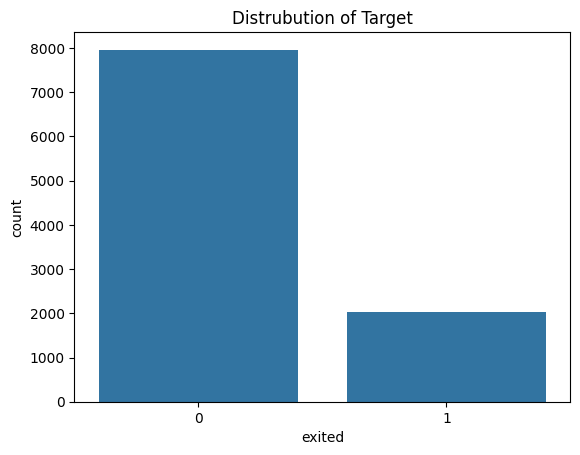

In [6]:
sns.barplot(df["exited"].value_counts())
plt.title("Distrubution of Target");

In [7]:
# Check the proportion of customers that churned and those that stayed

df["exited"].value_counts(normalize=True)

exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='exited', ylabel='proportion'>

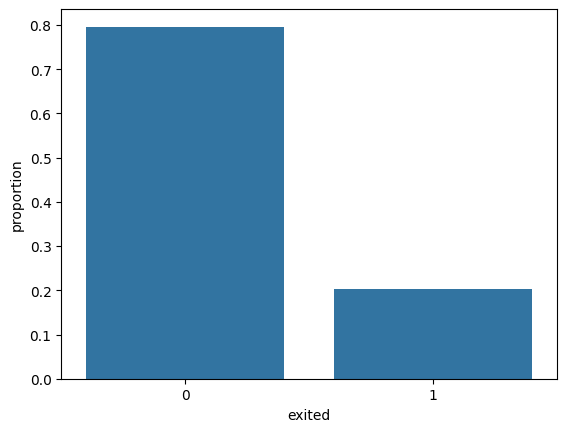

In [8]:
sns.barplot(df["exited"].value_counts(normalize=True))

### Numeric columns

In [9]:
df[numeric_cols].describe()

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


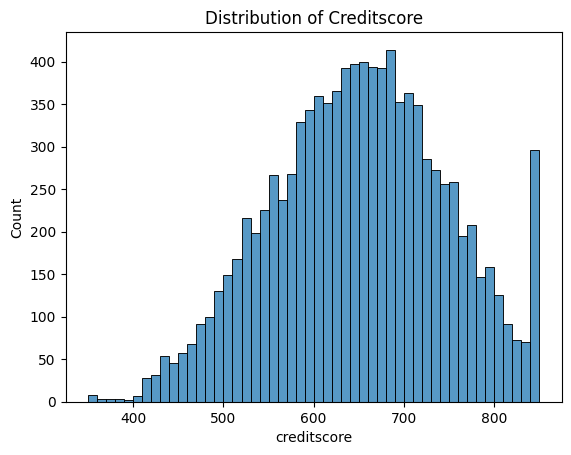

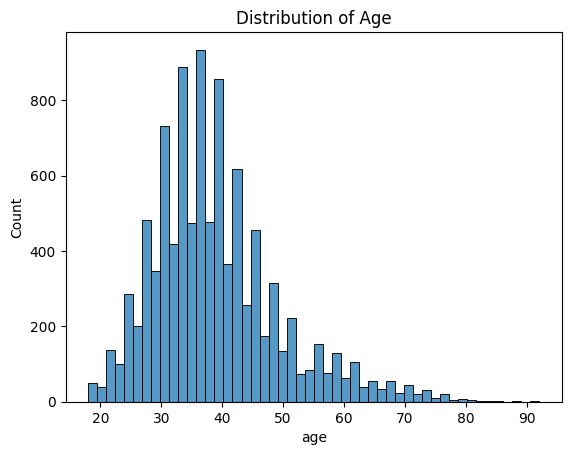

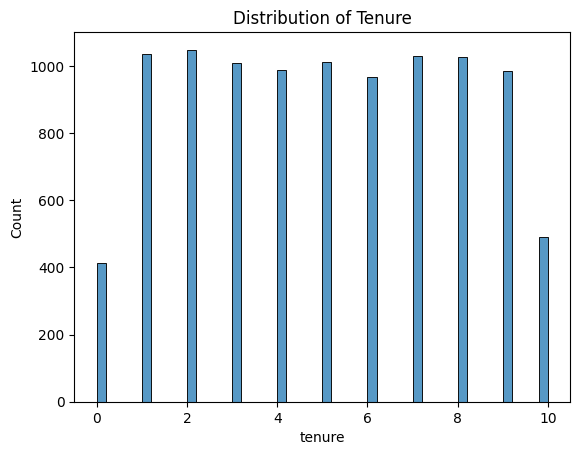

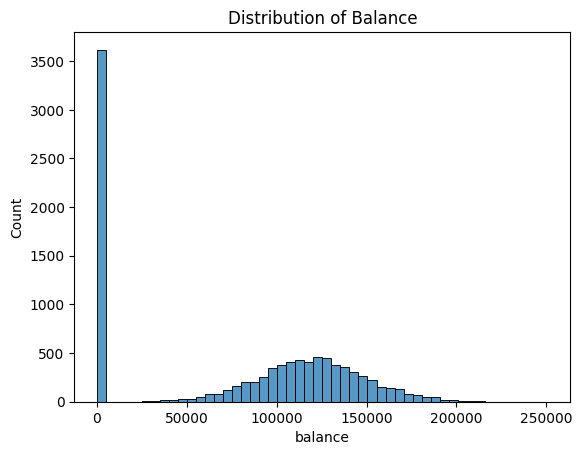

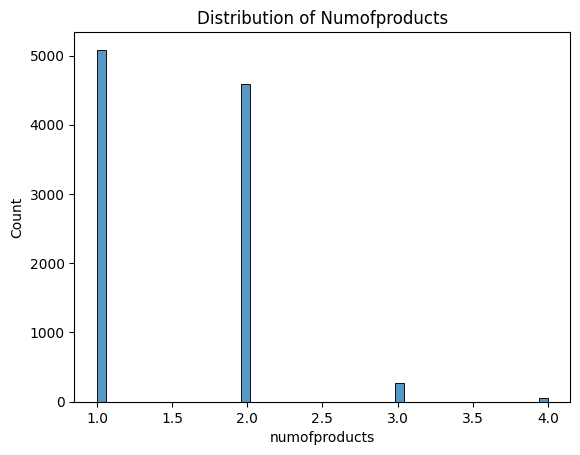

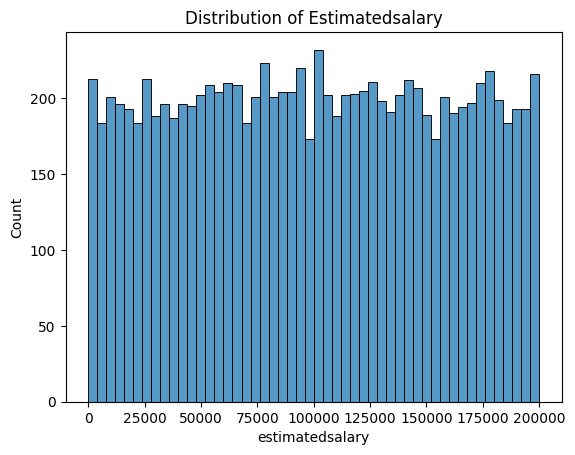

In [10]:
for col in numeric_cols:
    sns.histplot(df[col], bins=50)
    plt.title(f"Distribution of {col.title()}")
    plt.show()

### Categorical columns

Country
country
france     5014
germany    2509
spain      2477
Name: count, dtype: int64


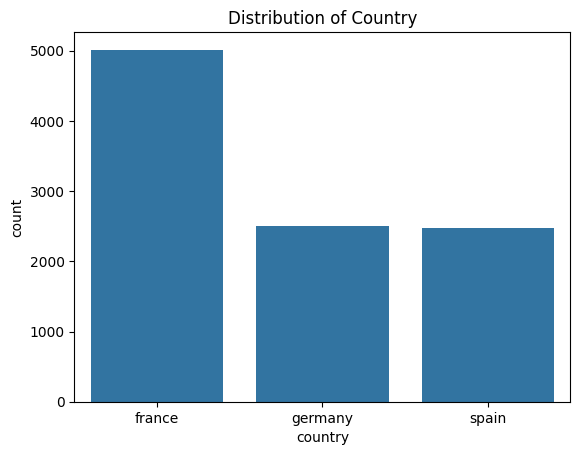

Gender
gender
male      5457
female    4543
Name: count, dtype: int64


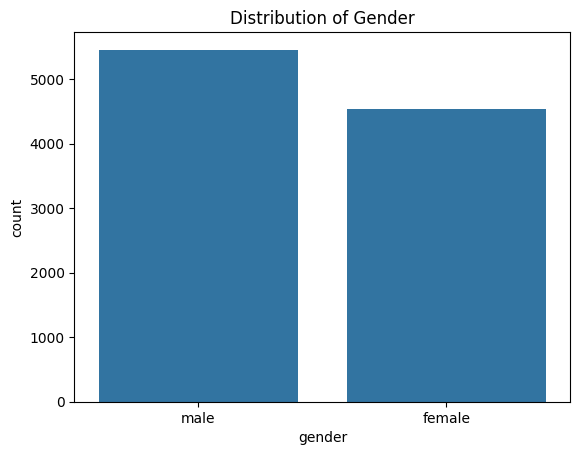

Hascrcard
hascrcard
1    7055
0    2945
Name: count, dtype: int64


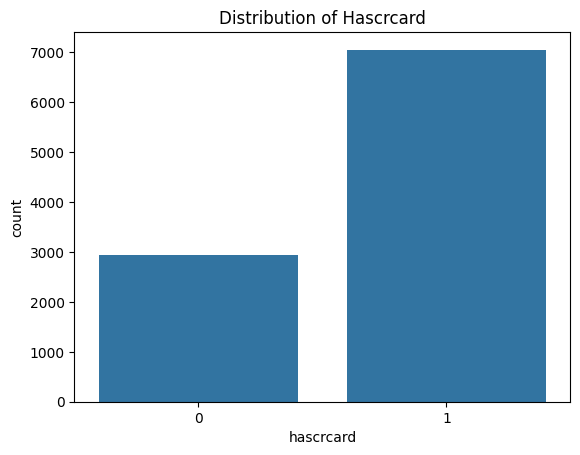

Isactivemember
isactivemember
1    5151
0    4849
Name: count, dtype: int64


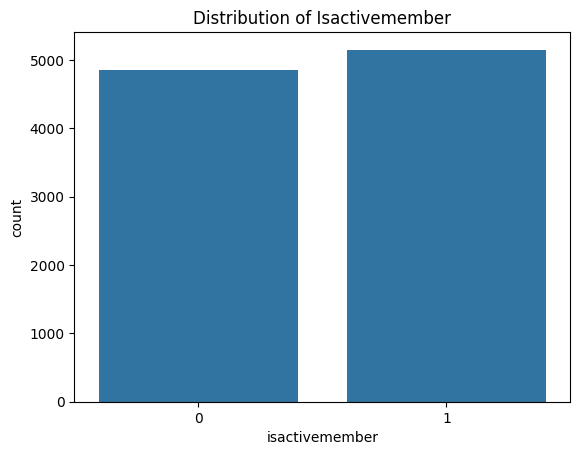

In [11]:
for col in categorical_cols:
    cat_counts = df[col].value_counts()
    print(f"{col.title()}")
    print("==============")
    print(cat_counts)
    sns.barplot(cat_counts)
    plt.title(f"Distribution of {col.title()}")
    plt.show()

### Bivariate Analysis

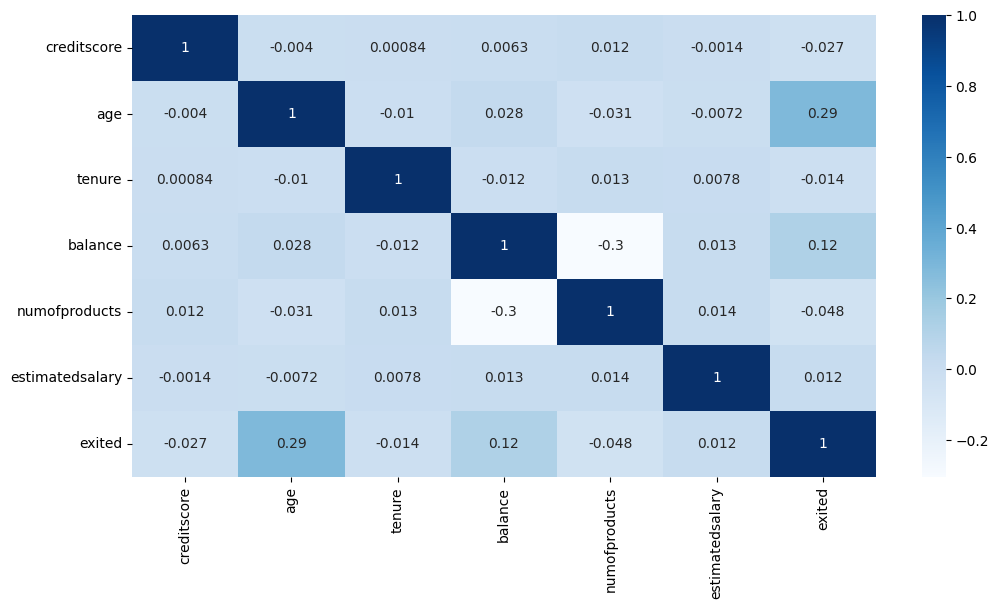

In [12]:
corr = df[numeric_cols + ["exited"]].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="Blues");

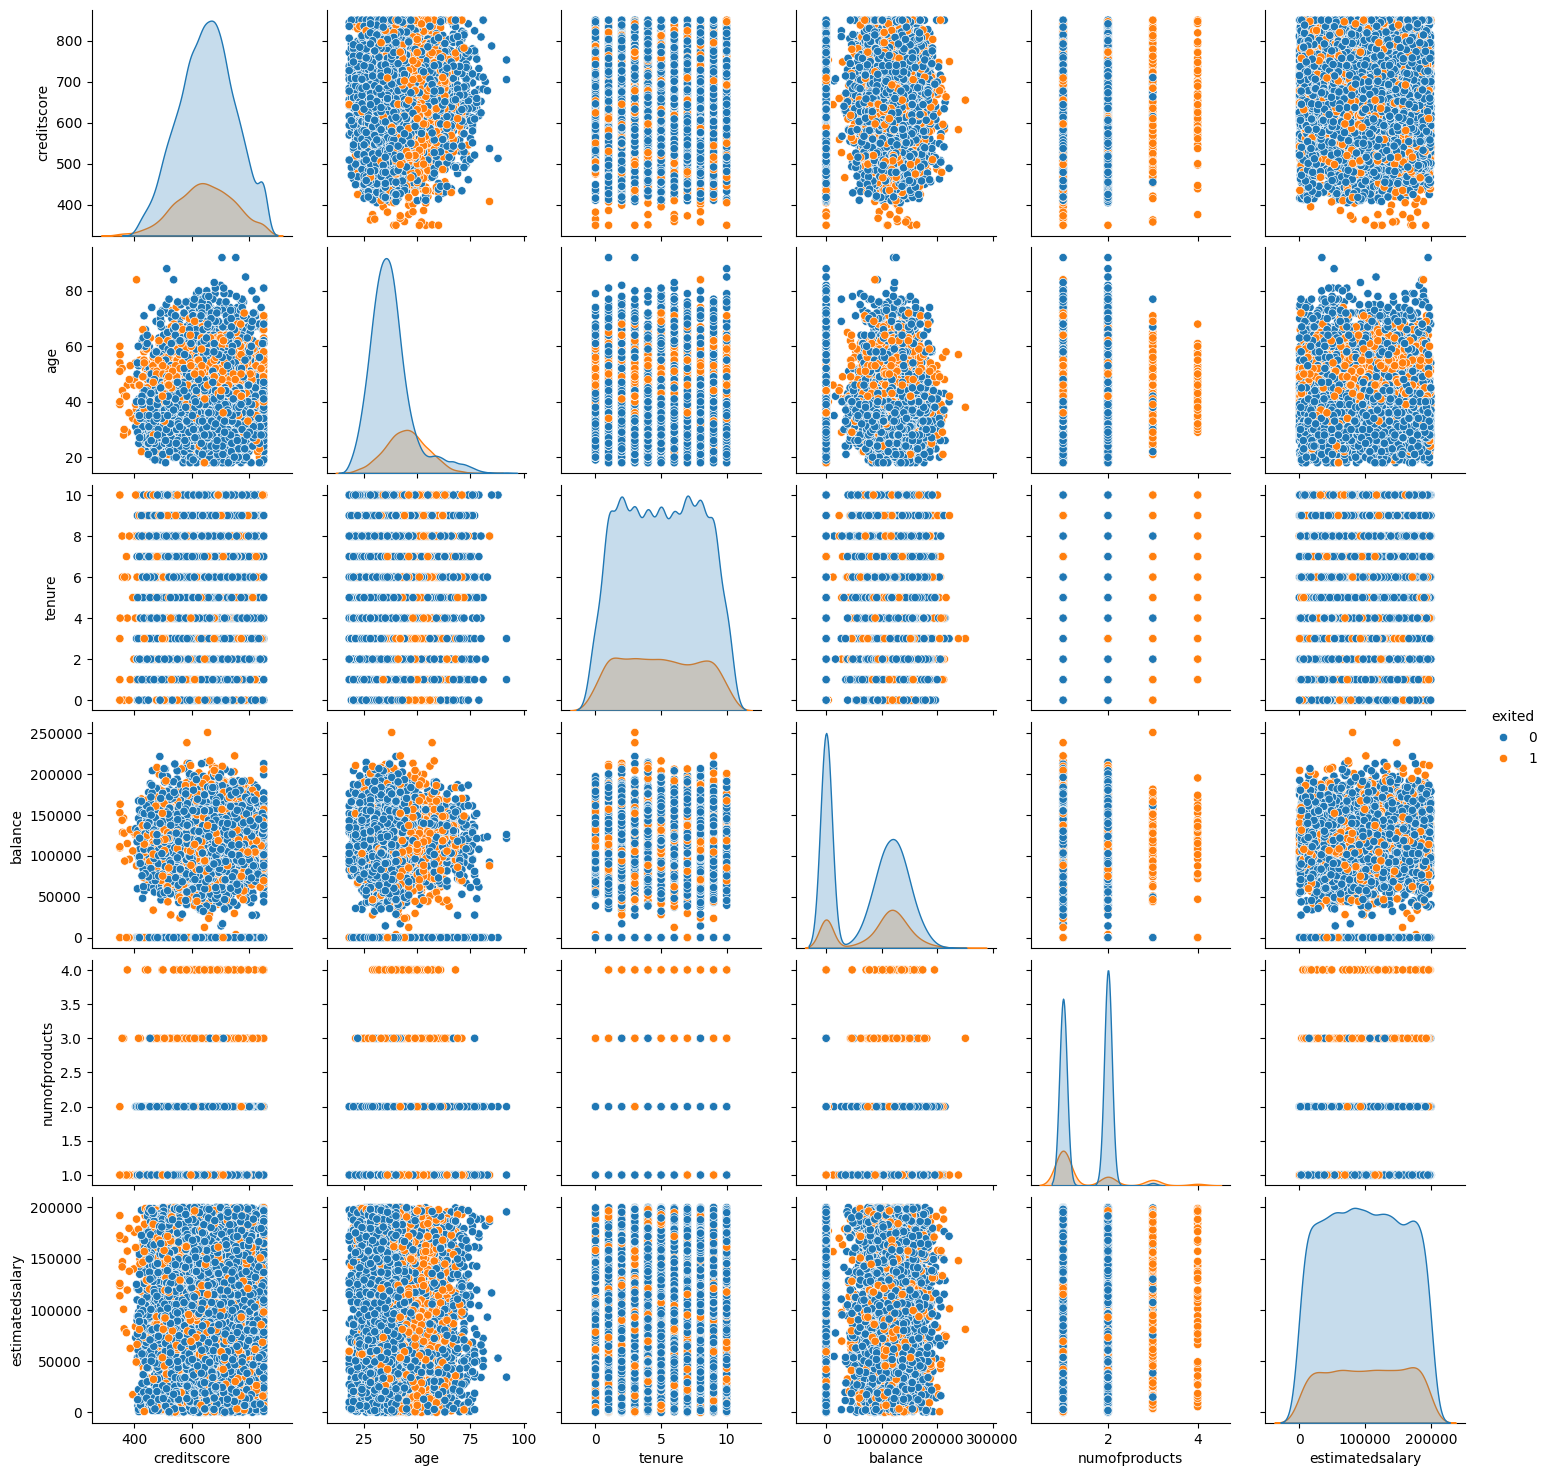

In [13]:
sns.pairplot(df[numeric_cols+["exited"]], hue="exited")

### Exploring average values by churn

exited
0    651.853196
1    645.351497
Name: creditscore, dtype: float64


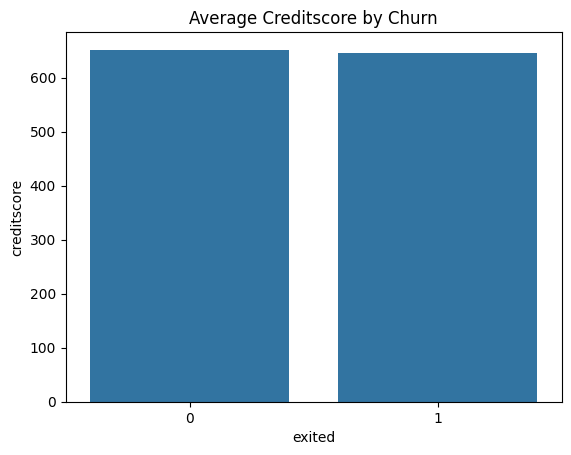

exited
0    37.408389
1    44.837997
Name: age, dtype: float64


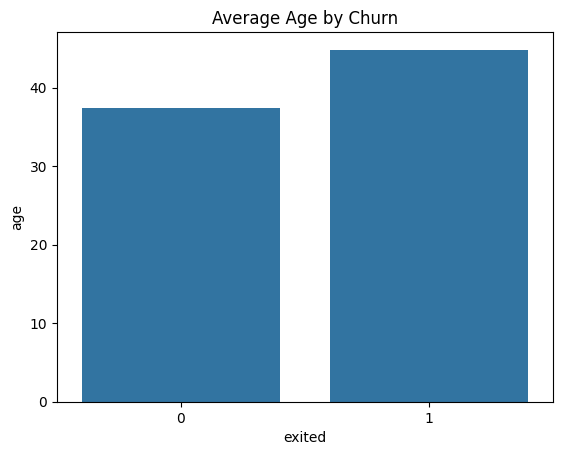

exited
0    5.033279
1    4.932744
Name: tenure, dtype: float64


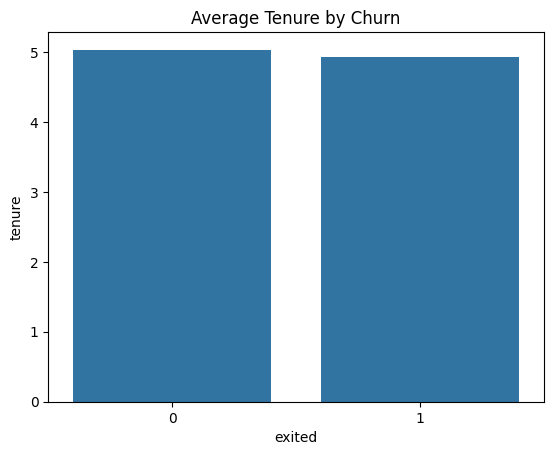

exited
0    72745.296779
1    91108.539337
Name: balance, dtype: float64


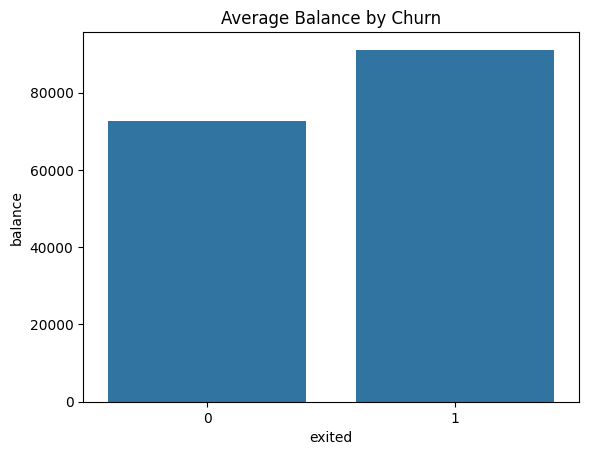

exited
0    1.544267
1    1.475209
Name: numofproducts, dtype: float64


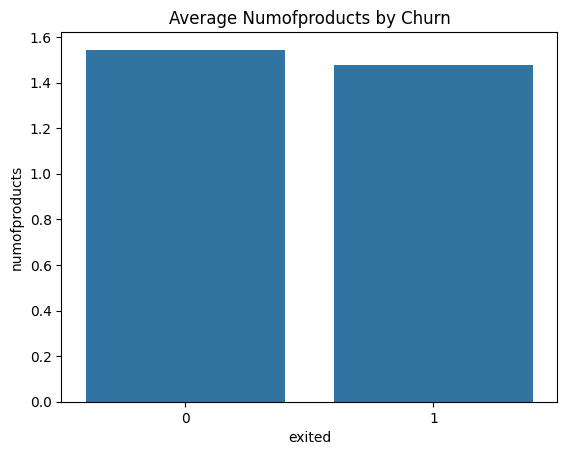

exited
0     99738.391772
1    101465.677531
Name: estimatedsalary, dtype: float64


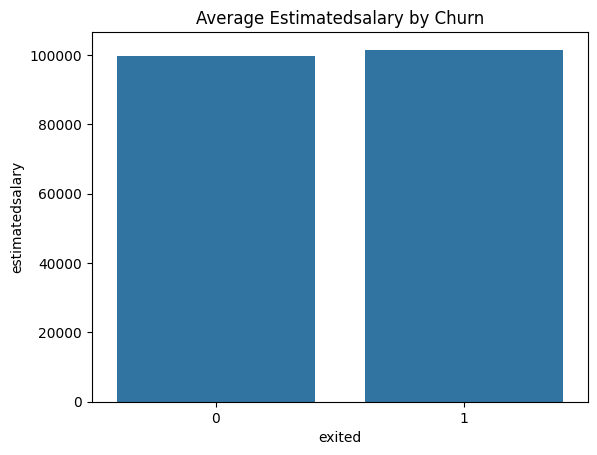

In [14]:
for col in numeric_cols:
    group_average = df.groupby("exited")[col].mean()
    print(group_average)
    sns.barplot(group_average)
    plt.title(f"Average {col.title()} by Churn")
    plt.show()

### Exploring churn by category

country
france     0.161548
germany    0.324432
spain      0.166734
Name: exited, dtype: float64


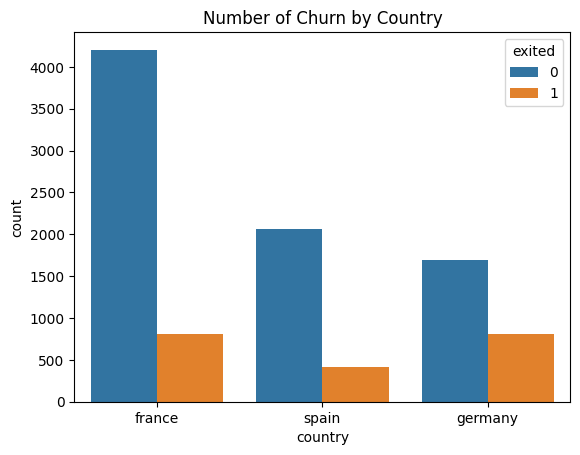

gender
female    0.250715
male      0.164559
Name: exited, dtype: float64


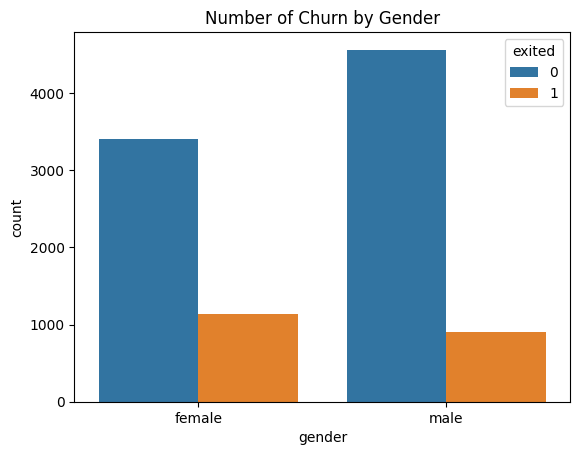

hascrcard
0    0.208149
1    0.201843
Name: exited, dtype: float64


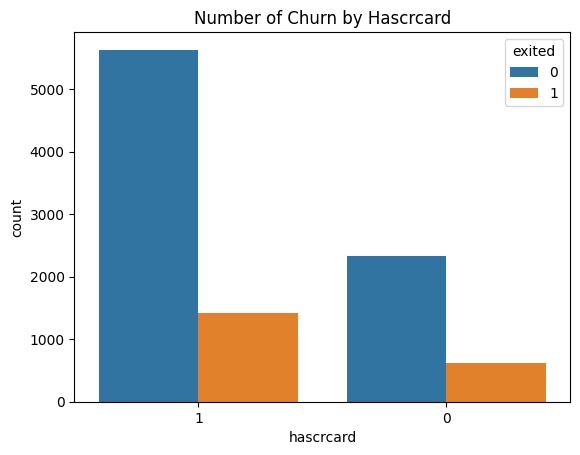

isactivemember
0    0.268509
1    0.142691
Name: exited, dtype: float64


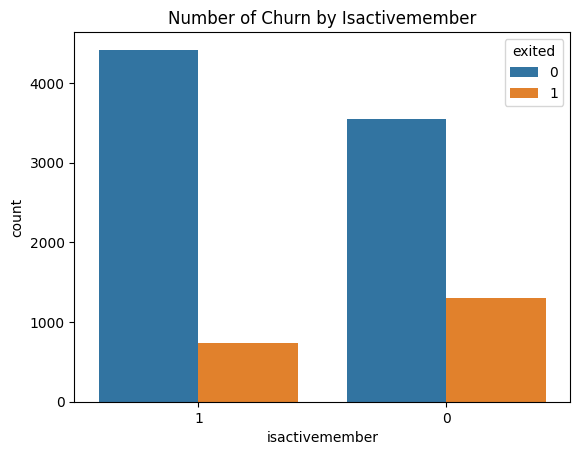

In [15]:
for col in categorical_cols:
    group_churn_rate = df.groupby(col)["exited"].mean()
    print(group_churn_rate)
    sns.countplot(x=df[col].astype(str), hue=df["exited"])
    plt.title(f"Number of Churn by {col.title()}")
    plt.show()

## Check mutual information score between categorical features and target

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
df[categorical_cols].apply(
    lambda feature: mutual_info_score(df["exited"], feature)
).sort_values(ascending=False)

country           0.014017
isactivemember    0.012291
gender            0.005652
hascrcard         0.000025
dtype: float64

## Key Takeaways

* The dataset contains records for 10,000 customers.
* Approximately 20% of the customers have left, while 80% have stayed.
* The majority of the customers, around 3,500, seem to have low balance in their accounts.
* The majority of the customers are between 30 and 40 years old.
* Most of the customers seem to use at most two products.
* Most of the customers, approximately 50%, are from France. The remaining customers are from Germany and Spain, with approximately 2,500 customers from each country.
* Churn seems to be common among older customers, mostly between 40 and 60 years old.
* The majority of customers that left use more than two products.
* Most of the customers that left are from Germany.
* Churn is most common among female customers.
* Churn is most common among inactive customers.